# Resample Data
## Pandas Resample
You've learned about bucketing to different periods of time like Months. Let's see how it's done. We'll start with an example series of days.

In [1]:
import numpy as np
import pandas as pd

dates = pd.date_range('10/10/2018', periods=11, freq='D')
close_prices = np.arange(len(dates))

close = pd.Series(close_prices, dates)
close

2018-10-10     0
2018-10-11     1
2018-10-12     2
2018-10-13     3
2018-10-14     4
2018-10-15     5
2018-10-16     6
2018-10-17     7
2018-10-18     8
2018-10-19     9
2018-10-20    10
Freq: D, dtype: int64

Let's say we want to _bucket_ (agrupar) these days into 3 day periods. **To do that, we'll use the [DataFrame.resample](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.resample.html) function**. The first parameter in this function is a string called `rule`, which is a representation of how to resample the data. This string representation is made using an offset alias. You can find a list of them [here](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases). To create 3 day periods, we'll set `rule` to "3D".

In [6]:
close.resample('3D')

DatetimeIndexResampler [freq=<3 * Days>, axis=0, closed=left, label=left, convention=start, base=0]

This returns a `DatetimeIndexResampler` object. It's an intermediate object similar to the `GroupBy` object. Just like group by, it breaks the original data into groups. That means, we'll have to apply an operation to these groups. Let's make it simple and get the first element from each group.

In [7]:
close.resample('3D').first()

2018-10-10    0
2018-10-13    3
2018-10-16    6
2018-10-19    9
dtype: int64

You might notice that **this is the same as `.iloc[::3]`**

In [8]:
close.iloc[::3]

2018-10-10    0
2018-10-13    3
2018-10-16    6
2018-10-19    9
Freq: 3D, dtype: int64

So, why use the `resample` function instead of `.iloc[::3]` or the `groupby` function?

The `resample` function _shines_ (brilla) when handling time and/or date specific tasks. In fact, you can't use this function if the index isn't a [time-related class](https://pandas.pydata.org/pandas-docs/version/0.21/timeseries.html#overview).

But, what is a [time-related class](https://pandas.pydata.org/pandas-docs/version/0.21/timeseries.html#overview)?

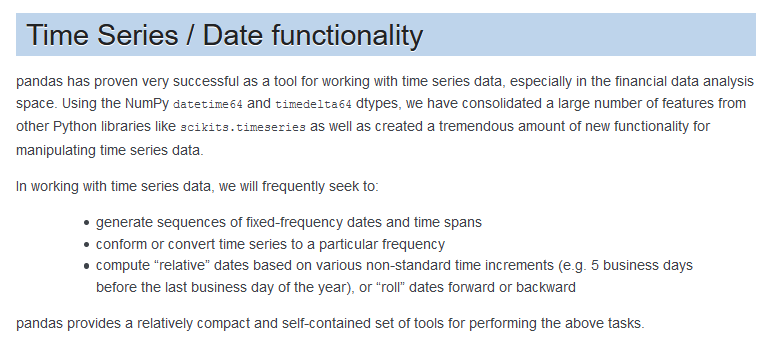

In [9]:
try:
    # Attempt resample on a series without a time index
    pd.Series(close_prices).resample('W')
except TypeError:
    print('It threw a TypeError.')
else:
    print('It worked.')

It threw a TypeError.


One of the resampling tasks it can help with is resampling on periods, like weeks. Let's resample `close` from it's days frequency to weeks. We'll use the "W" offset allies, which stands for Weeks.

In [10]:
pd.DataFrame({
    'days': close,
    'weeks': close.resample('W').first()})

,days,weeks
2018-10-10,0.0,NaN
2018-10-11,1.0,NaN
2018-10-12,2.0,NaN
2018-10-13,3.0,NaN
2018-10-14,4.0,0.0
2018-10-15,5.0,NaN
2018-10-16,6.0,NaN
2018-10-17,7.0,NaN
2018-10-18,8.0,NaN
2018-10-19,9.0,NaN


The weeks offset considers the start of a week on a Monday. Since 2018-10-10 is a Wednesday, the first group only looks at the first 5 items. There are offsets that handle _more complicated problems like filtering for Holidays_. For now, we'll only worry about resampling for days, weeks, months, quarters, and years. The frequency you want the data to be in, will depend on how often you'll be trading. If you're making trade decisions based on reports that come out at the end of the year, we might only care about a frequency of years or months.
## OHLC
Now that you've seen how Pandas resamples time series data, we can apply this to Open, High, Low, and Close (OHLC). Pandas provides the [`Resampler.ohlc`](https://pandas.pydata.org/pandas-docs/version/0.21.0/generated/pandas.core.resample.Resampler.ohlc.html#pandas.core.resample.Resampler.ohlc) function will convert any resampling frequency to OHLC data. Let's get the Weekly OHLC.

In [12]:
close.resample('W').ohlc()

,open,high,low,close
2018-10-14,0,4,0,4
2018-10-21,5,10,5,10


Can you spot a potential problem with that? It has to do with resampling data that has already been resampled.

We're getting the OHLC from close data. If we want OHLC data from already resampled data, we should resample the first price from the open data, resample the highest price from the high data, etc..

To get the weekly closing prices from `close`, you can use the [`Resampler.last`](https://pandas.pydata.org/pandas-docs/version/0.21.0/generated/pandas.core.resample.Resampler.last.html#pandas.core.resample.Resampler.last) function.

In [32]:
close

2018-10-10     0
2018-10-11     1
2018-10-12     2
2018-10-13     3
2018-10-14     4
2018-10-15     5
2018-10-16     6
2018-10-17     7
2018-10-18     8
2018-10-19     9
2018-10-20    10
Freq: D, dtype: int64

In [45]:
close.resample('W').max()

2018-10-14     4
2018-10-21    10
Freq: W-SUN, dtype: int64

In [14]:
close.resample('W').last()

2018-10-14     4
2018-10-21    10
Freq: W-SUN, dtype: int64

In [47]:
close.resample('W').first()

2018-10-14    0
2018-10-21    5
Freq: W-SUN, dtype: int64

In [48]:
pd.DataFrame({"open":close.resample('W').first()})

,open
2018-10-14,0
2018-10-21,5


In [37]:
close.resample('W').min()

2018-10-14    0
2018-10-21    5
Freq: W-SUN, dtype: int64

## Quiz
Implement `days_to_weeks` function to resample OHLC price data to weekly OHLC price data. You find find more Resampler functions [here](https://pandas.pydata.org/pandas-docs/version/0.21.0/api.html#id44) for calculating high and low prices.

In [49]:
import quiz_tests


def days_to_weeks(open_prices, high_prices, low_prices, close_prices):
    """Converts daily OHLC prices to weekly OHLC prices.
    
    Parameters
    ----------
    open_prices : DataFrame
        Daily open prices for each ticker and date
    high_prices : DataFrame
        Daily high prices for each ticker and date
    low_prices : DataFrame
        Daily low prices for each ticker and date
    close_prices : DataFrame
        Daily close prices for each ticker and date

    Returns
    -------
    open_prices_weekly : DataFrame
        Weekly open prices for each ticker and date
    high_prices_weekly : DataFrame
        Weekly high prices for each ticker and date
    low_prices_weekly : DataFrame
        Weekly low prices for each ticker and date
    close_prices_weekly : DataFrame
        Weekly close prices for each ticker and date
    """
    open_price = open_prices.resample('W').first()
    high_price = high_prices.resample('W').max()
    low_price = low_prices.resample('W').min()
    close_price = close_prices.resample('W').last()
    
    # TODO: Implement Function
    
    return open_price, high_price, low_price, close_price


quiz_tests.test_days_to_weeks(days_to_weeks)

Tests Passed


## Quiz Solution
If you're having trouble, you can check out the quiz solution [here](resample_data_solution.ipynb).